# Diccionario de la Data de Excel

## Del Excel "Tratatamiento de Datos"

- **INGRESO:** ID de Paciente con Digito Verificador
- **ID_INGRESO:** ID de Paciente sin Digito Verificador
- **ELEC_URG:** Dice si es Intervencion de Urgencia o Programada (ELEC, URG)
- **AMB_HOSP:** Dice si el Paciente requiere Hospitalizacion o si es Ambulatorio (HOSP, AMB)
- **DHING:** Fecha y Hora de Ingreso del Paciente
- **DHEG:** Fecha y Hora de Egreso de Paciente
- **HRSEST:** Horas entre el Ingreso y Egreso
- **HRSESTPOSTPAB:** Horas de Post Operatorio del Paciente
- **INIPAB:** Fecha y Hora de Inicio de la Cirugua
- **FINPAB:** Fecha y Hora de la Finalizacion de la Cirugia
- **DURPAB:** Duracion de la Cirugia en Horas
- **CIRUJANO:** Nombre del Cirujano a cargo del Paciente
- **STAFF:** Dice si el CIRUJANO pertenece al Staff o no (S, N)
- **ESPECIALIDAD_MEDICO:** Especialidad del Medico
- **COMUNA:** Comuna de Origen del Paciente
- **EDAD:** Edad en años del Paciente
- **ASEGURADOR:** Asegurador o Prevision del Paciente
- **IPLAN:** Plan de Isapre o Convenio del Paciente
- **CODCIRUGIA:** Codigo Interno de la Cirugia Principal a la que sometio el Paciente
- **CIRUGIA:** Nombre de la Cirugia Principal a la que se sometio el Paciente
- **ES_PQ:** Dice si la Cirugia es Paquetizada o no (PQ, AB)
- **IND_COBRO_PAQUETE:**
- **COD_PAQUETE:** Codigo Interno del Paquete de la Cirugia
- **TIPO_TECNICA:** Codigo Interno del Tipo de Tecnica Utilizado en la Cirugia
- **DESCRIPCION:** Descripcion de la Tecnica Utilizada en la Cirugia
- **COD_CIRUGIAS:** Codigos Internos de Todas las Cirugias Realizadas al Paciente en Pabellon
- **Nombre_CIRUJANO:** Nombre Completo del Cirujano a Cargo del Paciente
- **Cantidad_Cirugias:** Numero de Cirugias Hechas al Paciente en Pabellon

**Del Excel Anterior Solo se Utilizaran:**
- INGRESO
- ID_INGRESO
- ELEC_URG
- AMB_HOSP
- DURPAB
- STAFF
- ESPECIALIDAD_MEDICO
- COMUNA
- EDAD
- ASEGURADOR
- IPLAN
- CODCIRUGIA
- COD_CIRUGIAS
- Nombre_CIRUJANO
- Cantidad_Cirugias

## Del los Excel de "CONSUMOS"

En estos Excel's estan los datos de los insumos utilizados por paciente en cada cirugia desde el 2022 hasta el 2023, cada Excel tiene los datos de un trimestre, por lo tanto hay un total de 8 Archivos con Insumos por paciente.

- **ID_INGRESO:** ID de Paciente sin Digito Verificador
- **ID_LIQUIDACION:** Codigo Interno...(?)
- **DV_ID_INGRESO:** Numero Verificador del ID del Paciente
- **DESC_ITEM:** Area a la que Pertenece el Insumo
- **FECHA_CONTABLE:** Fecha y Hora en la que se registro el Insumo
- **FECHA_CONSUMO:** Fecha y Hora en la que se hizo uso del Insumo
- **ID_CONSUMO:** ID interno del Insumo
- **CODIGO_MOVIMIENTO:** Codigo Interno...(?)
- **TIPO_CONSUMO:** Categoria General en la que se dio uso el Insumo (EXA, RECETA)
- **COD_CENTRO:** Codigo Interno del Centro Medico (?)
- **COD_ISAPRE:** Codigo Interno de....(?)
- **NOMBRE_GRUPO_ABA:** Nombre de la Categoria del Insumo
- **NOMBRE_TIPO_ABA:** Nombre de la Sub Categoria del Insumo
- **COD_PRODUCTO:** Codigo Interno del Insumo (Solo para los Insumos del tipo 'RECETA')
- **COD_PRESTACION:** Codigo Interno de....(?)
- **NOMBRE:** Nombre del Insumo
- **NOMBRE_EMBALAJE:** Formato y Unidad de Medida del Insumo
- **AFECTO:** (?)
- **EXENTO:** (?)
- **IVA:** (?)
- **TOTAL:** (?)
- **CANTIDAD:** (?)
- **COSTO:** (?)
- **RECARGO:** (?)


**De los Excel's anteriores se utilizarán solamente los siguientes atributos:**
- ID_INGRESO
- DV_ID_INGRESO
- DESC_ITEM
- ID_CONSUMO
- TIPO_CONSUMO
- NOMBRE_GRUPO_ABA
- NOMBRE_TIPO_ABA
- NOMBRE
- NOMBRE_EMBALAJE


***Se Utilizará ID_INGRESO para el cruce de todos los archivos**

# Importar Archivos EXCEL

In [2]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Removes the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Importar Tratamiento de Datos
Trat_Dat = pd.read_excel('Tratamiento de Datos.xlsx', sheet_name= "Tabla Consolidada Filtrada")

#Extraer Solo las Columnas deseadas:
columnas_deseadas = ["INGRESO", "ID_INGRESO", "ELEC_URG", "AMB_HOSP", "DURPAB", "STAFF", "ESPECIALIDAD_MEDICO", "COMUNA", "EDAD", "ASEGURADOR", "IPLAN", "CODCIRUGIA", "COD_CIRUGIAS", "Nombre_CIRUJANO", "Cantidad_Cirugias"]

# Seleccionar solo las columnas deseadas de Trat_Dat
Trat_Dat_Final = Trat_Dat.loc[:, columnas_deseadas]


In [3]:
#Importar "COSTOS"

archivos = ['01-03 22.xlsx', '04-06 22.xlsx', '07-09 22.xlsx', '10-12 22.xlsx',
            '01-03 23.xlsx', '04-06 23.xlsx', '07-09 23.xlsx', '10-12 23.xlsx']

dataframes_concatenados = {}

for archivo in archivos:
    excel_file = pd.ExcelFile(archivo)
    hojas = excel_file.sheet_names[:-1]  # Excluir la última hoja
    dfs = []
    for hoja in hojas:
        df = pd.read_excel(excel_file, sheet_name=hoja)
        dfs.append(df)
    dataframes_concatenados[archivo] = pd.concat(dfs, ignore_index=True)
    excel_file.close()

tabla_final = pd.concat(dataframes_concatenados.values(), ignore_index=True)

In [ ]:
#Codigo Corregido por el Profe:
#import pandas as pd
#from multiprocessing import Pool

#archivos = ['01-03 22.xlsx', '04-06 22.xlsx', '07-09 22.xlsx', '10-12 22.xlsx',
#            '01-03 23.xlsx', '04-06 23.xlsx', '07-09 23.xlsx', '10-12 23.xlsx']

#def procesar_excel(archivo):
#    dfs = []
#    with pd.ExcelFile(archivo, engine='openpyxl') as excel_file:
#        hojas = excel_file.sheet_names[:-1]  # Excluir la última hoja
#        for hoja in hojas:
#            df = pd.read_excel(excel_file, sheet_name=hoja)
            # Puedes especificar las columnas necesarias aquí si no necesitas todas
#            dfs.append(df)
#    return pd.concat(dfs, ignore_index=True)

#if __name__ == '__main__':
#    with Pool() as pool:
#        dataframes_concatenados = pool.map(procesar_excel, archivos)

#    tabla_final = pd.concat(dataframes_concatenados, ignore_index=True)

In [4]:
#tabla_final.head(5) #Comprobacion de la consolidacion de los archivos

In [4]:
#Extraer Solo las Columnas deseadas:
columnas_deseadas1 = ["ID_INGRESO", "DV_ID_INGRESO", "DESC_ITEM", "ID_CONSUMO", 
                     "TIPO_CONSUMO", "NOMBRE_GRUPO_ABA", "NOMBRE_TIPO_ABA", 
                     "NOMBRE", "NOMBRE_EMBALAJE"]

# Seleccionar solo las columnas deseadas de tabla_final
Costos_Final = tabla_final.loc[:, columnas_deseadas1]


In [5]:
#Cruce entre los Dataframes de Consumos y Datos Pacientes de "Tratamiento de Datos"
Cruce_Final = pd.merge(Trat_Dat_Final, Costos_Final, on="ID_INGRESO", how="inner")

# Guardar el DataFrame como un archivo Excel
#Cruce_Final_Ex = "Cruce_Final_Ex.xlsx"
#Cruce_Final.to_excel(Cruce_Final_Ex, index=False) #NO SE PUDO POR EXCEDER EL NUMERO MAX DE FILAS (7.112.622, 22)

In [6]:
# Guarda el DataFrame como un archivo CSV

Cruce_Final_Ex = "Cruce_Final_Ex.csv"

Cruce_Final.to_csv(Cruce_Final_Ex, index=False)


In [7]:
print(Cruce_Final.columns)

Index(['INGRESO', 'ID_INGRESO', 'ELEC_URG', 'AMB_HOSP', 'DURPAB', 'STAFF',
       'ESPECIALIDAD_MEDICO', 'COMUNA', 'EDAD', 'ASEGURADOR', 'IPLAN',
       'CODCIRUGIA', 'COD_CIRUGIAS', 'Nombre_CIRUJANO', 'Cantidad_Cirugias',
       'DV_ID_INGRESO', 'DESC_ITEM', 'ID_CONSUMO', 'TIPO_CONSUMO',
       'NOMBRE_GRUPO_ABA', 'NOMBRE_TIPO_ABA', 'NOMBRE', 'NOMBRE_EMBALAJE'],
      dtype='object')


In [3]:
# Sacando los datos de "Cruce_Final"para definir el top 10 de 'COD_CIRUGIAS' y su correspondiente promedio, min, max y devest de "DURPAB"

# Top 10 'COD_CIRUGIAS' más frecuentes
top_10_cirugias = Cruce_Final['COD_CIRUGIAS'].value_counts().head(10).sort_values(ascending=False)

# Filtro del DataFrame original para obtener solo las filas del top 10 cirugías más frecuentes
datos_top_10 = Cruce_Final[Cruce_Final['COD_CIRUGIAS'].isin(top_10_cirugias.index.tolist())]

# Promedio, mínimo, máximo, la desviación estándar y la frecuencia de 'DURPAB' para estas top 10 cirugías
top_10_stats = datos_top_10.groupby('COD_CIRUGIAS')['DURPAB'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index().sort_values(by='count', ascending=False)

# Cambiando el nombre de las columnas con sus respectivos estadisticos
top_10_stats.columns = ['COD_CIRUGIAS', 'Promedio_DURPAB', 'Min_DURPAB', 'Max_DURPAB', 'Desviacion_Estandar_DURPAB', 'Frecuencia']

# Guardado de resultados en un DataFrame 'Top_10_Cirugias'
Top_10_Cirugias = top_10_stats.copy()

# Mostramos el DataFrame para probarlo:
print(Top_10_Cirugias)


NameError: name 'Cruce_Final' is not defined

In [12]:
#Para una tabla bonita:

from tabulate import tabulate

print(tabulate(top_10_stats, headers='keys', tablefmt='pretty', showindex=False))



+-----------------------------------------------------+--------------------+------------+------------+----------------------------+------------+
|                    COD_CIRUGIAS                     |  Promedio_DURPAB   | Min_DURPAB | Max_DURPAB | Desviacion_Estandar_DURPAB | Frecuencia |
+-----------------------------------------------------+--------------------+------------+------------+----------------------------+------------+
|                17-50-061-00|-1|-1|-1                | 108.84615384615384 |     30     |    410     |     96.39973834074368      |   916110   |
|                11-03-042-00|-1|-1|-1                | 107.28312348009882 |     27     |    148     |      43.6025989405941      |   518537   |
|      11-03-011-00|11-03-015-00|11-03-005-00|-1      | 74.61538461538461  |     14     |    150     |     45.885440589743055     |   339456   |
|                18-02-081-00|-1|-1|-1                | 63.338527350192415 |     14     |    300     |     34.40996281088456      

In [4]:
#Ahora que ya tengo el cruce en "csv" para ahorrar tiempo:

cruce_final = pd.read_csv("Cruce_Final_Ex.csv")

# Top 10 'COD_CIRUGIAS' más frecuentes
top_10_cirugias = cruce_final['COD_CIRUGIAS'].value_counts().head(10).sort_values(ascending=False)

# Filtro del DataFrame original para obtener solo las filas del top 10 cirugías más frecuentes
datos_top_10 = cruce_final[cruce_final['COD_CIRUGIAS'].isin(top_10_cirugias.index.tolist())]

# Promedio, mínimo, máximo, la desviación estándar y la frecuencia de 'DURPAB' para estas top 10 cirugías
top_10_stats = datos_top_10.groupby('COD_CIRUGIAS')['DURPAB'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index().sort_values(by='count', ascending=False)

# Cambiando el nombre de las columnas con sus respectivos estadísticos
top_10_stats.columns = ['COD_CIRUGIAS', 'Promedio_DURPAB', 'Min_DURPAB', 'Max_DURPAB', 'Desviacion_Estandar_DURPAB', 'Frecuencia']

# Guardado de resultados en un DataFrame 'Top_10_Cirugias'
top_10_cirugias_df = top_10_stats.copy()

# Mostramos el DataFrame para probarlo:
print(top_10_cirugias_df)


                                        COD_CIRUGIAS  Promedio_DURPAB  \
4                              17-50-061-00|-1|-1|-1       108.846154   
2                              11-03-042-00|-1|-1|-1       107.283123   
0          11-03-011-00|11-03-015-00|11-03-005-00|-1        74.615385   
8                              18-02-081-00|-1|-1|-1        63.338527   
3                    11-03-043-00|11-03-043-00|-1|-1       137.611225   
9                              18-50-004-00|-1|-1|-1        91.521344   
1                              11-03-026-00|-1|-1|-1       234.410905   
6  17-50-207-00|11-50-027-12|17-50-210-00|17-50-2...       102.222222   
7                              18-02-001-00|-1|-1|-1        62.899734   
5                              17-50-062-00|-1|-1|-1       165.750000   

   Min_DURPAB  Max_DURPAB  Desviacion_Estandar_DURPAB  Frecuencia  
4          30         410                   96.399738      916110  
2          27         148                   43.602599      5

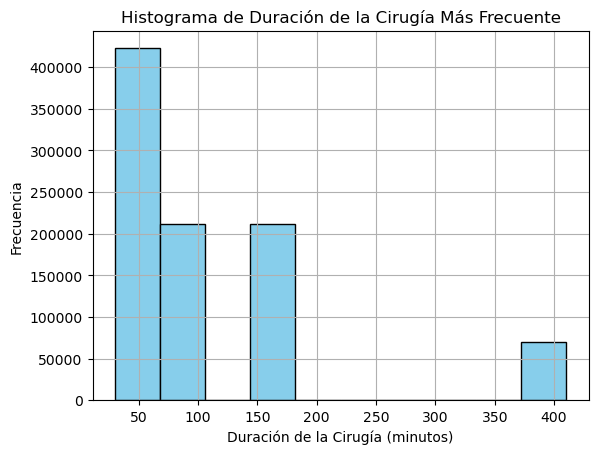

In [6]:
#Histograma del Top1 Cirugia:

# Filtrar el DataFrame para la cirugía más frecuente (top 1)
top_1_cirugia = top_10_stats.iloc[0]['COD_CIRUGIAS']
cirugia_mas_frecuente = cruce_final[cruce_final['COD_CIRUGIAS'] == top_1_cirugia]

# Crear el histograma de la duración de la cirugía más frecuente
plt.hist(cirugia_mas_frecuente['DURPAB'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Duración de la Cirugía (horas)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Duración de la Cirugía Más Frecuente')
plt.grid(True)
plt.show()

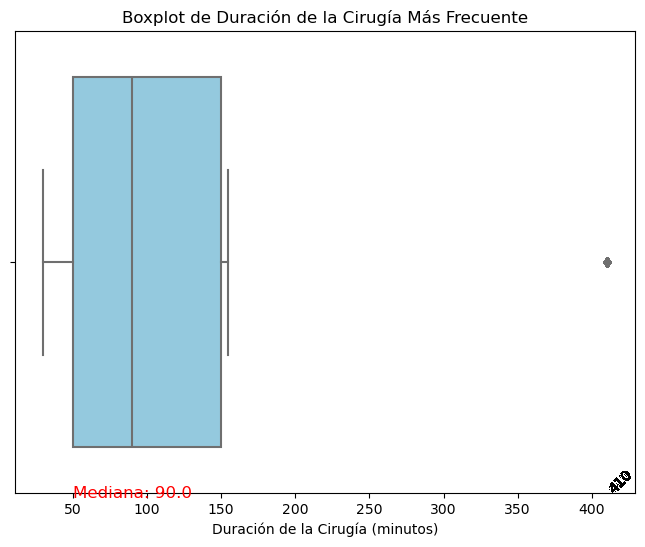

In [8]:
#Boxplot de la cirugia mas frecuente con respecto a su duracion en pabellon:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=cirugia_mas_frecuente['DURPAB'], color='skyblue')

# Rotulos outliers
outliers = cirugia_mas_frecuente['DURPAB'][cirugia_mas_frecuente['DURPAB'] > cirugia_mas_frecuente['DURPAB'].quantile(0.75) + 1.5 * (cirugia_mas_frecuente['DURPAB'].quantile(0.75) - cirugia_mas_frecuente['DURPAB'].quantile(0.25))] 
for outlier in outliers:
    plt.text(outlier, 0.5, f'{outlier}', rotation=45)

# Rotulos mediana
median = cirugia_mas_frecuente['DURPAB'].median()
plt.text(median, 0.5, f'Mediana: {median}', ha='center', va='center', color='red', fontsize=12)

plt.xlabel('Duración de la Cirugía (horas)')
plt.title('Boxplot de Duración de la Cirugía Más Frecuente')
plt.show()


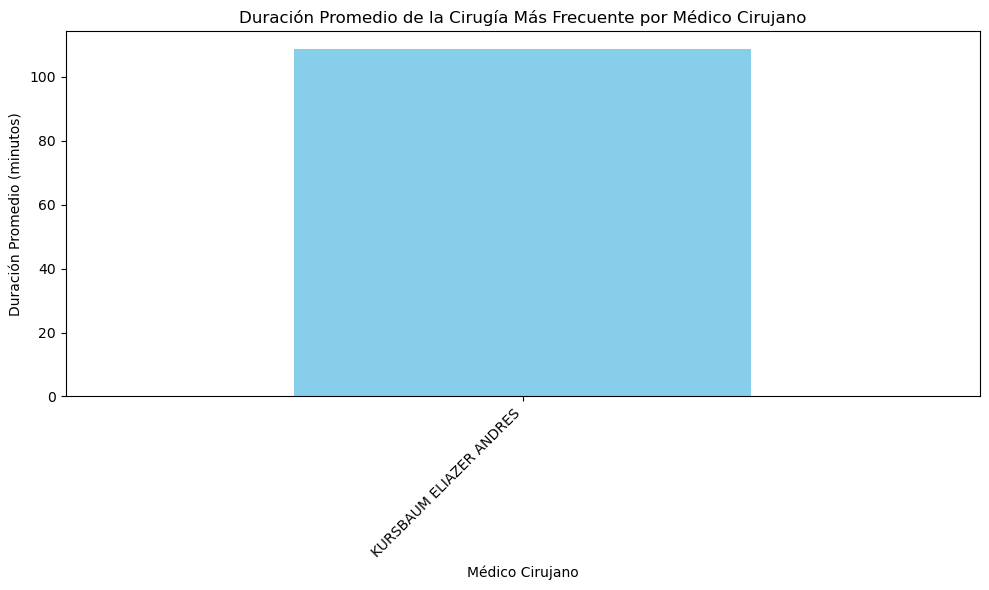

In [9]:
#Duracion promedio de cirugia por medico:
promedio_duración_por_medico = cirugia_mas_frecuente.groupby('Nombre_CIRUJANO')['DURPAB'].mean().sort_values(ascending=False)

# Tendencia de duración promedio de la cirugía para cada médico.
plt.figure(figsize=(10, 6))
promedio_duración_por_medico.plot(kind='bar', color='skyblue')
plt.title('Duración Promedio de la Cirugía Más Frecuente por Médico Cirujano')
plt.xlabel('Médico Cirujano')
plt.ylabel('Duración Promedio (horas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
cirugia_mas_frecuente.head()

,INGRESO,ID_INGRESO,ELEC_URG,AMB_HOSP,DURPAB,STAFF,ESPECIALIDAD_MEDICO,COMUNA,EDAD,ASEGURADOR,IPLAN,CODCIRUGIA,COD_CIRUGIAS,Nombre_CIRUJANO,Cantidad_Cirugias,DV_ID_INGRESO,DESC_ITEM,ID_CONSUMO,TIPO_CONSUMO,NOMBRE_GRUPO_ABA,NOMBRE_TIPO_ABA,NOMBRE,NOMBRE_EMBALAJE
1221541,1096872-0,1096872,ELEC,HOSP,30,S,CIRUGIA TORAX,CONCHALI,50,ISAPRE CONSALUD,CONSALUD GES,13-02-072-00,17-50-061-00|-1|-1|-1,KURSBAUM ELIAZER ANDRES,1,0,CENTROS DE COSTOS,NaN,NaN,,,,
1221542,1096872-0,1096872,ELEC,HOSP,30,S,CIRUGIA TORAX,CONCHALI,50,ISAPRE CONSALUD,CONSALUD GES,13-02-072-00,17-50-061-00|-1|-1|-1,KURSBAUM ELIAZER ANDRES,1,0,PABELLÓN CENTRAL,377704738.0,INSUMOS,,,PACK EPP PABELLON,
1221543,1096872-0,1096872,ELEC,HOSP,30,S,CIRUGIA TORAX,CONCHALI,50,ISAPRE CONSALUD,CONSALUD GES,13-02-072-00,17-50-061-00|-1|-1|-1,KURSBAUM ELIAZER ANDRES,1,0,PABELLÓN CENTRAL,NaN,INSUMOS,,,,
1221544,1096872-0,1096872,ELEC,HOSP,30,S,CIRUGIA TORAX,CONCHALI,50,ISAPRE CONSALUD,CONSALUD GES,13-02-072-00,17-50-061-00|-1|-1|-1,KURSBAUM ELIAZER ANDRES,1,0,PABELLÓN CENTRAL,NaN,INSUMOS,,,,
1221545,1096872-0,1096872,ELEC,HOSP,30,S,CIRUGIA TORAX,CONCHALI,50,ISAPRE CONSALUD,CONSALUD GES,13-02-072-00,17-50-061-00|-1|-1|-1,KURSBAUM ELIAZER ANDRES,1,0,BANCO SANGRE,377684978.0,EXA,,,"ISOINMUNIZACION, INVESTIGACION DE. (PROC",


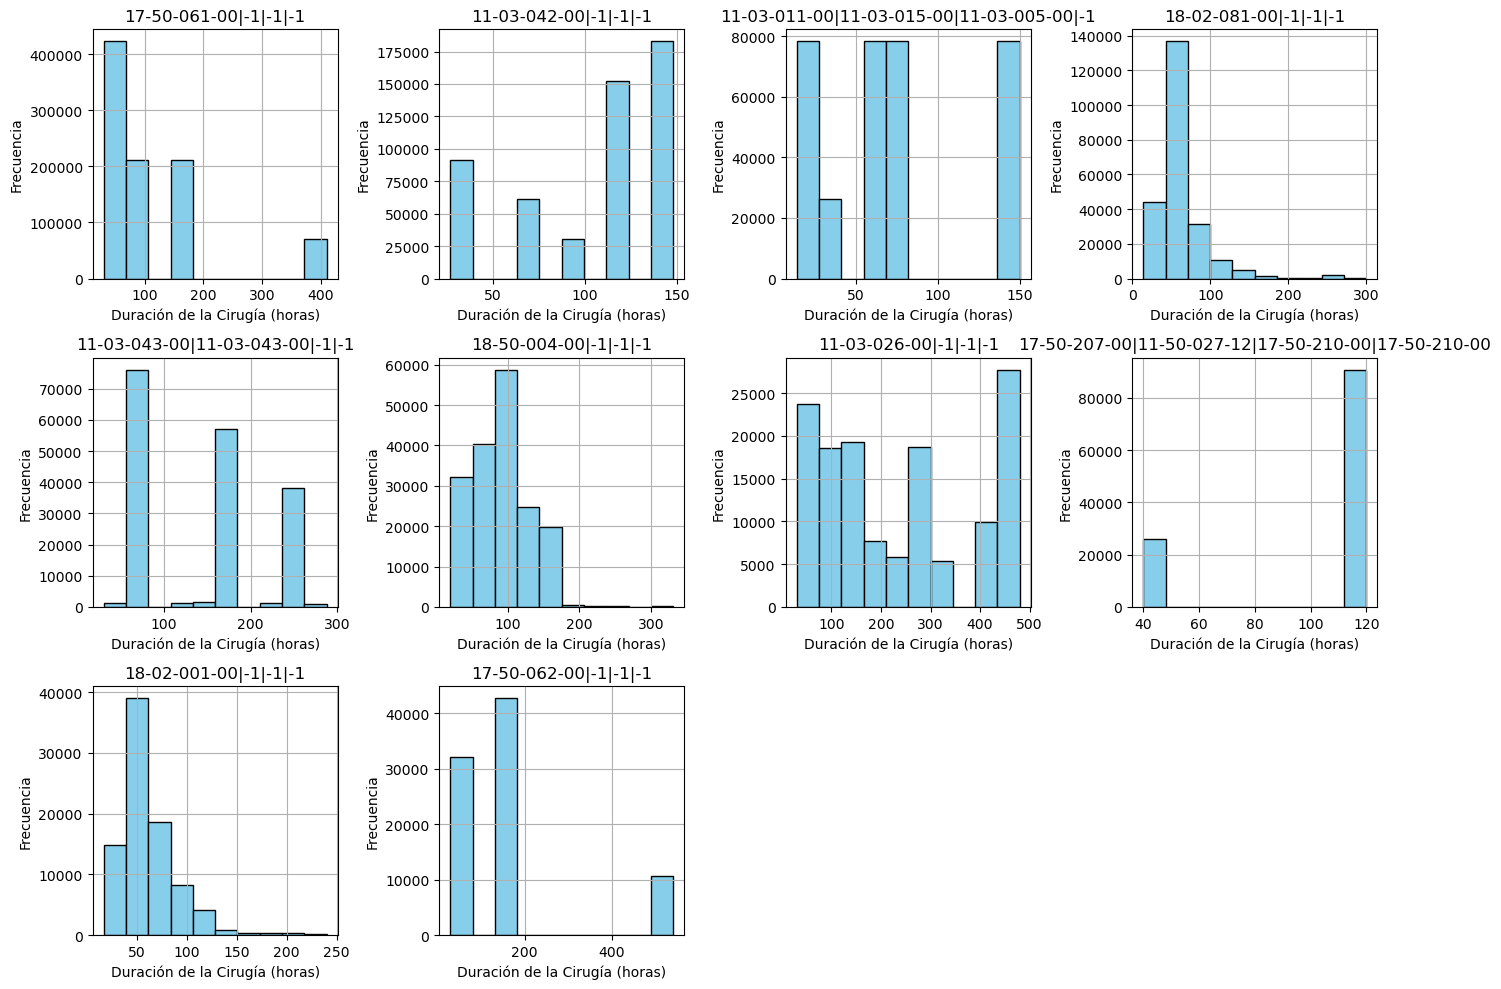

In [23]:
#Lo mismo para el top10 cirugias:
top_10_cirugias = top_10_stats['COD_CIRUGIAS']

#cirugías top10:
cirugias_mas_frecuentes = cruce_final[cruce_final['COD_CIRUGIAS'].isin(top_10_cirugias)]

# Crear histogramas para cada cirugía más frecuente en el top 10:
plt.figure(figsize=(14, 10))
for i, cirugia in enumerate(top_10_cirugias):
    plt.subplot(3, 4, i + 1)
    datos_cirugia = cirugias_mas_frecuentes[cirugias_mas_frecuentes['COD_CIRUGIAS'] == cirugia]
    plt.hist(datos_cirugia['DURPAB'], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('Duración de la Cirugía (horas)')
    plt.ylabel('Frecuencia')
    plt.title(f'{cirugia}')
    plt.grid(True)

plt.tight_layout()
plt.show()

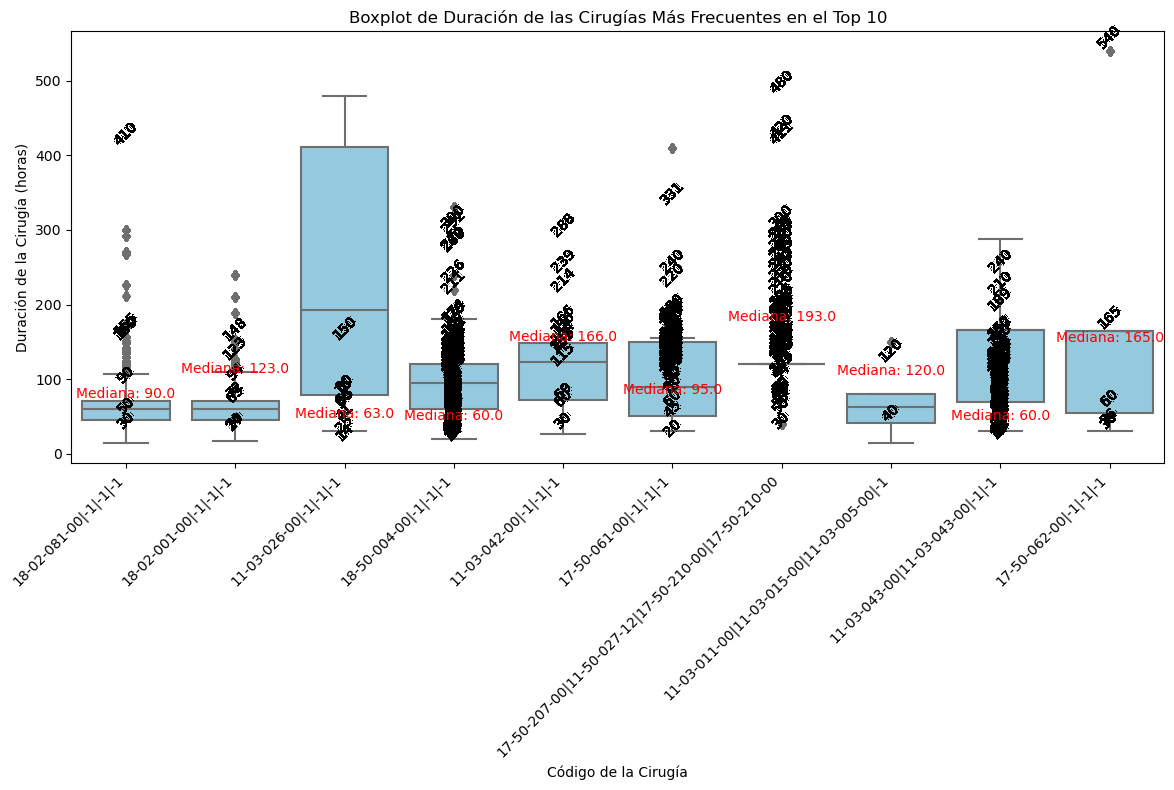

In [24]:
# Boxplot 10 cirugías más frecuentes:
plt.figure(figsize=(12, 8))
sns.boxplot(x='COD_CIRUGIAS', y='DURPAB', data=cirugias_mas_frecuentes, color='skyblue')

# Añadir etiquetas a los outliers
for i in range(len(top_10_cirugias)):
    cod_cirugia = top_10_cirugias.iloc[i]
    outliers = cirugias_mas_frecuentes.loc[cirugias_mas_frecuentes['COD_CIRUGIAS'] == cod_cirugia, 'DURPAB']
    for outlier in outliers:
        plt.text(i, outlier, f'{outlier}', ha='center', va='bottom', rotation=45)

# Añadir etiqueta de la mediana
for i, cod_cirugia in enumerate(top_10_cirugias):
    median = cirugias_mas_frecuentes.loc[cirugias_mas_frecuentes['COD_CIRUGIAS'] == cod_cirugia, 'DURPAB'].median()
    plt.text(i, median, f'Mediana: {median}', ha='center', va='top', color='red', fontsize=10)

# Configurar ejes y título
plt.xlabel('Código de la Cirugía')
plt.ylabel('Duración de la Cirugía (horas)')
plt.title('Boxplot de Duración de las Cirugías Más Frecuentes en el Top 10')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el boxplot
plt.tight_layout()
plt.show()
